In [30]:
## Import the necessary libraries:-

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [31]:
data =pd.read_csv("E:\ineuron_test\ml_code\ml_Q1\instagram_reach.csv")

In [32]:
## Checking top 5 rows
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [33]:
## Checking Rows & Columns Availabale in Dataset
data.shape

(100, 8)

In [34]:
## Checking Details Information related with Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [35]:
## Checking Null Values
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [36]:
## Droping Null Value
data = data.dropna()

In [37]:
## Checking Again Null Values whether Null Value Drop or Not
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [38]:
## Checking All Columns name present in dataset
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [39]:
# Display the columns in the DataFrame
print(data.columns)

# Remove unnecessary columns if they exist
columns_to_remove = ['Unnamed: 0', 'S.No']
data = data.drop(columns_to_remove, axis=1, errors='ignore')

# Display the updated DataFrame
print(data)


Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')
                USERNAME                                            Caption  \
0          mikequindazzi  Who are #DataScientist and what do they do? >>...   
1        drgorillapaints  We all know where it’s going. We just have to ...   
2     aitrading_official  Alexander Barinov: 4 years as CFO in multinati...   
3   opensourcedworkplace                                               sfad   
4            crea.vision  Ever missed a call while your phone was chargi...   
..                   ...                                                ...   
95        michaelgarza__  328 S. Wetherly Drive, Beverly Hills, CA 90212...   
96           dvlp_search  Credit @tristankappel To find more dvlp follow...   
97            ecom.space  We are coming up with the Best 21 Books that w...   
98        lb3enterprises  We’re only paid to move dirt once. It’s not ju.

In [40]:
data.duplicated().sum()

0

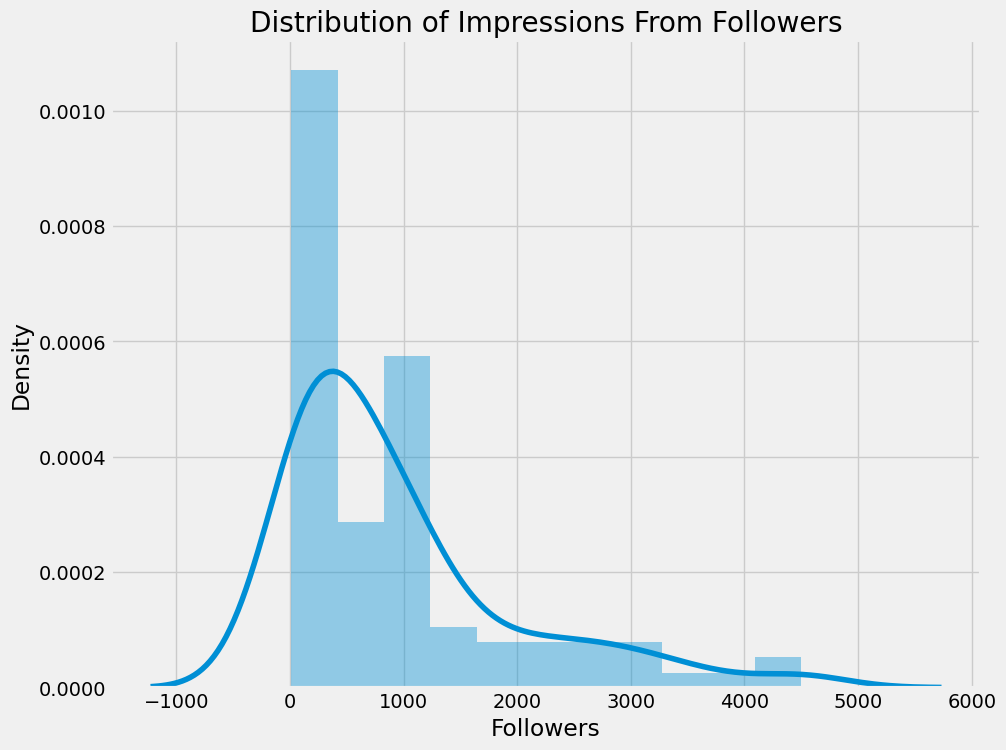

In [41]:
## EDA
## Distribution of Impressions From Followers

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

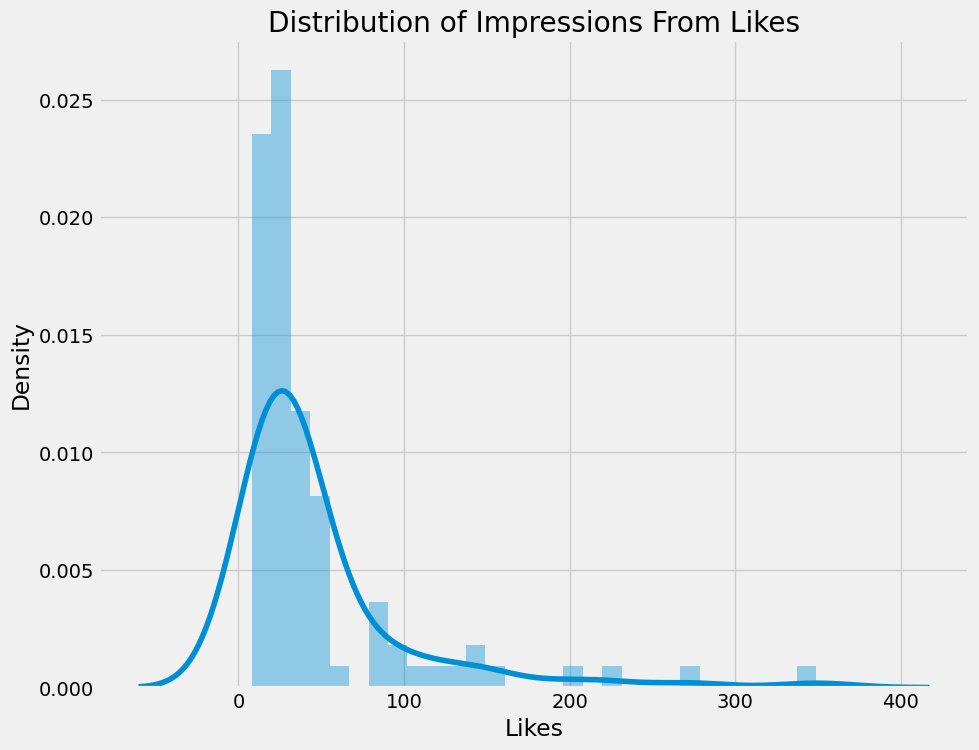

In [42]:
## Distribution of Impressions From Likes

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

In [44]:
followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [ ]:
# Split the data into training and testing sets

X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

e:\ineuron_test\env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1835.9315673582162


In [ ]:
#Train a model to predict the time since posted

In [ ]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [ ]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [ ]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 13.324786731523542
